In [8]:
import osmnx as ox
import networkx as nx
import geopandas as gp
import matplotlib.pyplot as plt

In [9]:
portland = (45.523064,-122.676483)

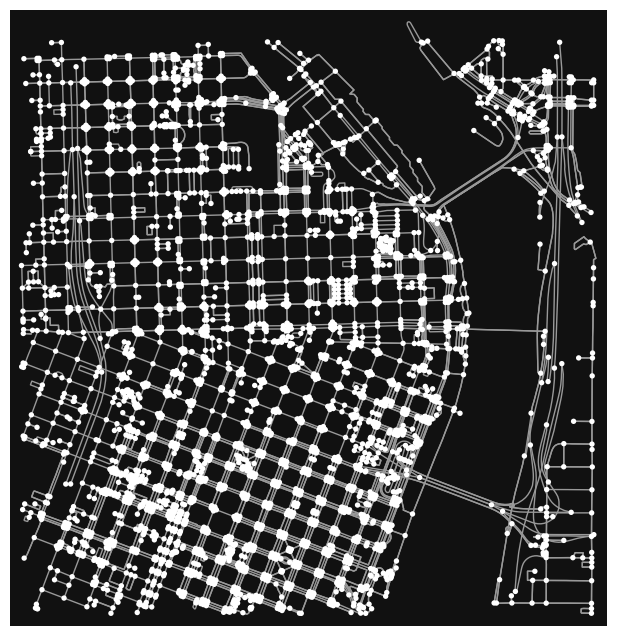

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
base_map = ox.graph_from_point(portland, dist = 1000)
ox.plot_graph(base_map)

In [11]:
base_map_proj = ox.project_graph(base_map)
nodes_proj = ox.graph_to_gdfs(base_map_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

3954290.346835416

In [12]:
ox.basic_stats(base_map_proj, area=graph_area_m, clean_int_tol=15)

{'n': 3506,
 'm': 9731,
 'k_avg': 5.5510553337136335,
 'edge_length_total': 278715.5110000003,
 'edge_length_avg': 28.642021477751545,
 'streets_per_node_avg': 3.3739304050199657,
 'streets_per_node_counts': {0: 0,
  1: 270,
  2: 18,
  3: 1395,
  4: 1779,
  5: 42,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07701083856246435,
  2: 0.00513405590416429,
  3: 0.39788933257273246,
  4: 0.5074158585282373,
  5: 0.011979463776383342,
  6: 0.0005704506560182544},
 'intersection_count': 3236,
 'street_length_total': 174537.46399999995,
 'street_segment_count': 5827,
 'street_length_avg': 29.95322876265659,
 'circuity_avg': 1.0499685016696243,
 'self_loop_proportion': 0.0013729191693839025,
 'clean_intersection_count': 500,
 'node_density_km': 886.6319092642808,
 'intersection_density_km': 818.3516424355997,
 'edge_density_km': 70484.3313347119,
 'street_density_km': 44138.757827856716,
 'clean_intersection_density_km': 126.44493857163161}

In [13]:
edge_centrality = nx.closeness_centrality(nx.line_graph(base_map))
nx.set_edge_attributes(base_map, edge_centrality, "edge_centrality")

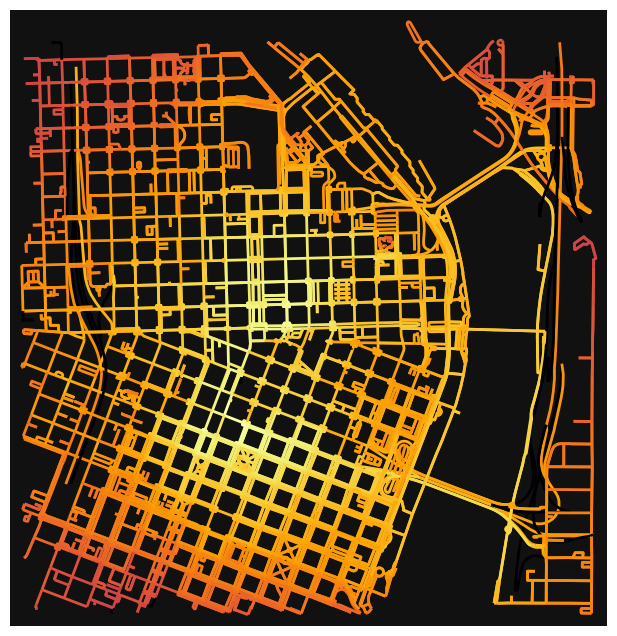

In [14]:
ec = ox.plot.get_edge_colors_by_attr(base_map, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(base_map, edge_color=ec, edge_linewidth=2, node_size=0)